In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hmf as hmf_calc
from colossus import lss


In [2]:
hmfBehroozi = hmf_calc.MassFunction(hmf_model=hmf_calc.fitting_functions.Behroozi)
hmfTinker08 = hmf_calc.MassFunction(hmf_model=hmf_calc.fitting_functions.Tinker08)
hmfTinker10 = hmf_calc.MassFunction(hmf_model=hmf_calc.fitting_functions.Tinker10)
hmfCrocce = hmf_calc.MassFunction(hmf_model=hmf_calc.fitting_functions.Crocce)
hmfWatson = hmf_calc.MassFunction(hmf_model= hmf_calc.fitting_functions.Watson)
hmfBhattacharya = hmf_calc.MassFunction(hmf_model= hmf_calc.fitting_functions.Bhattacharya)
hmfManera = hmf_calc.MassFunction(hmf_model= hmf_calc.fitting_functions.Manera)
hmfAngulo = hmf_calc.MassFunction(hmf_model= hmf_calc.fitting_functions.Angulo)

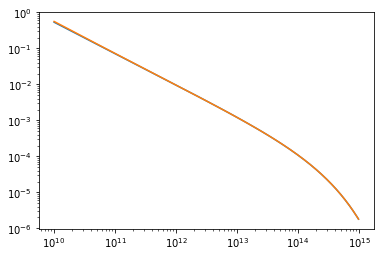

In [3]:
plt.loglog(hmfBehroozi.m, hmfBehroozi.dndlog10m)
plt.loglog(hmfTinker08.m, hmfTinker08.dndlog10m)

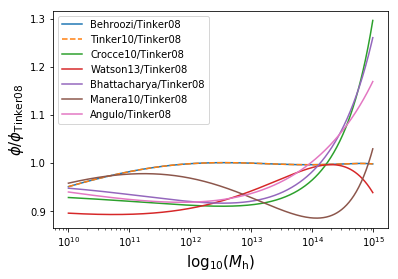

In [4]:
plt.semilogx(hmfBehroozi.m, hmfBehroozi.dndlog10m/hmfTinker08.dndlog10m, label='Behroozi/Tinker08')
plt.semilogx(hmfBehroozi.m, hmfTinker10.dndlog10m/hmfTinker08.dndlog10m, '--', label='Tinker10/Tinker08')
plt.semilogx(hmfBehroozi.m, hmfCrocce.dndlog10m/hmfTinker08.dndlog10m, label='Crocce10/Tinker08' )
plt.semilogx(hmfBehroozi.m, hmfWatson.dndlog10m/hmfTinker08.dndlog10m, label='Watson13/Tinker08' )
plt.semilogx(hmfBehroozi.m, hmfBhattacharya.dndlog10m/hmfTinker08.dndlog10m, label='Bhattacharya/Tinker08' )
plt.semilogx(hmfBehroozi.m, hmfManera.dndlog10m/hmfTinker08.dndlog10m, label='Manera10/Tinker08' )
plt.semilogx(hmfBehroozi.m, hmfAngulo.dndlog10m/hmfTinker08.dndlog10m, label='Angulo/Tinker08' )
plt.xlabel('$\mathrm{log}_{10}(M_{\mathrm{h}})$', size=15)
plt.ylabel('$\phi / \phi_{\mathrm{Tinker08}}$', size=15)
plt.legend()


In [5]:
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck13');

In [6]:
from colossus.lss import mass_function

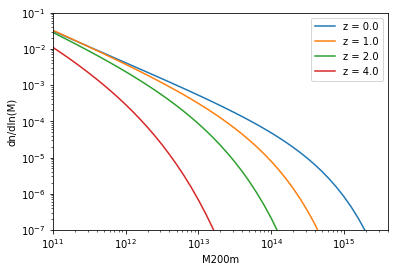

In [7]:
z = [0.0, 1.0, 2.0, 4.0]
M = 10**np.arange(11.0, 15.5, 0.1)

plt.figure()
plt.xlabel('M200m')
plt.ylabel('dn/dln(M)')
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

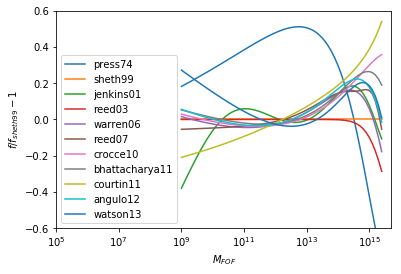

In [8]:
z = 0.0
M = 10**np.arange(9.0, 15.5, 0.1)

plt.figure()
plt.xscale('log')
plt.xlabel('$M_{FOF}$')
plt.ylabel('$f/f_{sheth99} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'sheth99')
for model in mass_function.models:
    if 'fof' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = 'fof', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);

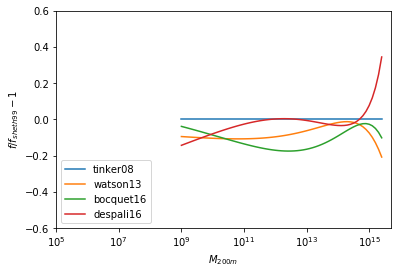

In [9]:


plt.figure()
plt.xscale('log')
plt.xlabel('$M_{200m}$')
plt.ylabel('$f/f_{sheth99} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'tinker08', mdef = '200m')
for model in mass_function.models:
    if '200m' in mass_function.models[model].mdefs or '*' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = '200m', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);



In [10]:
redshifts = np.array([0.2, 0.5, 0.8, 1.1, 1.5, 2, 2.5, 3, 3.5, 4.5, 5.5])
redshiftsbin = (redshifts[1:]+redshifts[:-1])
numzbin = np.size(redshifts) - 1

In [11]:
hmf=[]
print('Use Depsali+16 HMF in Planck15 cosmo from Colossus module')
mdef = '200m'
print('Use '+mdef+' for the SO defintion.')

redshift_haloes = redshiftsbin
M = 10**np.arange(8.0, 15.5, 0.01)
for i in range(numzbin):
    hmf.append(np.transpose(np.array([np.log10(M / cosmo.h), np.log10(mass_function.massFunction(M, redshift_haloes[i], mdef = mdef, model ='despali16', q_out = 'dndlnM'))])))


Use Depsali+16 HMF in Planck15 cosmo from Colossus module
Use 200m for the SO defintion.


In [12]:
hmfct=[]
mdef = '200m'
print('Use '+mdef+' for the SO defintion.')

redshift_haloes = redshiftsbin
M = 10**np.arange(8.0, 15.5, 0.01)
for i in range(numzbin):
    hmfct.append(np.transpose(np.array([np.log10(M / cosmo.h), np.log10(mass_function.massFunction(M, redshift_haloes[i], mdef = mdef, model ='tinker08', q_out = 'dndlnM'))])))


Use 200m for the SO defintion.


In [67]:
hmft=[]
# print hmf parameters with h.param_values
print('Use Tinker+08 HMF in PLanck cosmo from hmf module')
h = hmf_calc.MassFunction()
h.update(Mmin=8)
h.update(Mmax=15.5)

print(h.parameter_values)
redshift_haloes = redshiftsbin
for i in range(numzbin):
    h.update(z=redshiftsbin[i])
    hmft.append(np.transpose(np.array([np.log10(h.m / h.cosmo_model.h),
               np.log10(h.dndlog10m * (h.cosmo_model.h)**3)])))  # Replace the h implicit in the HMF


Use Tinker+08 HMF in PLanck cosmo from hmf module
{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), 'cosmo_params': {}, 'n': 0.9667, 'sigma_8': 0.8159, 'growth_model': <class 'hmf.growth_factor.GrowthFactor'>, 'growth_params': {}, 'lnk_min': -18.420680743952367, 'lnk_max': 9.903487552536127, 'dlnk': 0.05, 'z': 0.0, 'transfer_model': <class 'hmf.transfer_models.EH'>, 'transfer_params': {}, 'takahashi': True, 'hmf_model': <class 'hmf.fitting_functions.Tinker08'>, 'Mmin': 8, 'Mmax': 15.5, 'dlog10m': 0.01, 'delta_h': 200.0, 'delta_wrt': 'mean', 'delta_c': 1.686, 'hmf_params': {}, 'filter_model': <class 'hmf.filters.TopHat'>, 'filter_params': {}}


In [14]:
h.cosmo_model.Om0

0.3075

In [62]:
print(cosmo)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


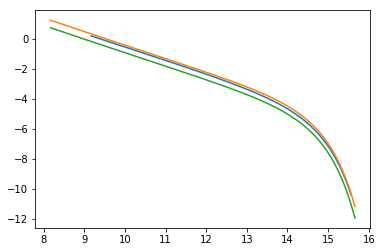

In [60]:
plt.plot(hmf[0][:,0], hmf[0][:,1])
plt.plot(hmfct[0][:,0], hmfct[0][:,1])
plt.plot(hmft[0][:,0], hmft[0][:,1])


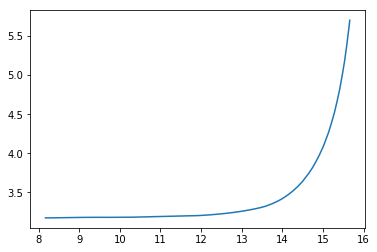

In [18]:
#plt.plot(hmf[0][:,0], 10**hmf[0][:,1] / 10**hmft[0][:,1])
plt.plot(hmfct[0][:,0], 10**hmfct[0][:,1] / 10**hmft[0][:,1])

#plt.ylim(1, 1.7)

In [41]:
hmfCalcCrocce = hmf_calc.MassFunction(hmf_model=hmf_calc.fitting_functions.Crocce)
hmfCalcCrocce.update(Mmin=8)
hmfCalcCrocce.update(Mmax=15.5)
print(hmfCalcCrocce.parameter_values)


M = 10**np.arange(8.0, 15.5, 0.01)
cosmo = cosmology.setCosmology('planck15');
colossusCrocce = mass_function.massFunction(M, 0, mdef = 'fof', model ='crocce10', q_out = 'dndlnM')

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), 'cosmo_params': {}, 'n': 0.9667, 'sigma_8': 0.8159, 'growth_model': <class 'hmf.growth_factor.GrowthFactor'>, 'growth_params': {}, 'lnk_min': -18.420680743952367, 'lnk_max': 9.903487552536127, 'dlnk': 0.05, 'z': 0.0, 'transfer_model': <class 'hmf.transfer_models.EH'>, 'transfer_params': {}, 'takahashi': True, 'hmf_model': <class 'hmf.fitting_functions.Crocce'>, 'Mmin': 8, 'Mmax': 15.5, 'dlog10m': 0.01, 'delta_h': 200.0, 'delta_wrt': 'mean', 'delta_c': 1.686, 'hmf_params': {}, 'filter_model': <class 'hmf.filters.TopHat'>, 'filter_params': {}}


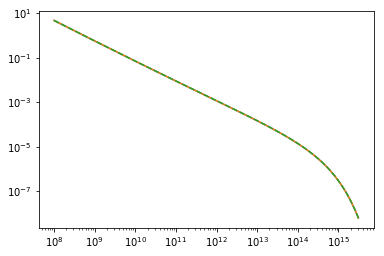

In [52]:
#plt.loglog(hmfCalcCrocce.m, hmfCalcCrocce.dndlog10m)
plt.loglog(hmfCalcCrocce.m, hmfCalcCrocce.dndlnm* (h.cosmo_model.h)**3)
plt.loglog(hmfCalcCrocce.m, hmfCalcCrocce.dndlog10m* (h.cosmo_model.h)**3/ np.log(10))
plt.loglog(M, colossusCrocce * (h.cosmo_model.h)**3, '--')

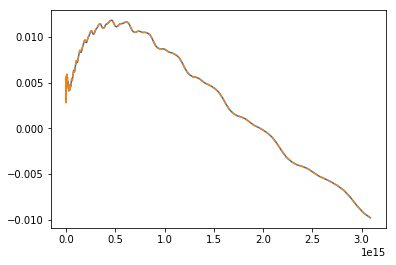

In [48]:
plt.plot(M, colossusCrocce / hmfCalcCrocce.dndlnm -1)
plt.plot(M, colossusCrocce / hmfCalcCrocce.dndlog10m *np.log(10) -1, '--')

In [27]:
hmfCalcCrocce.dndlnm

array([], dtype=float64)

In [76]:
hmf=[]        
print('Use Depsali+16 HMF in Planck15 cosmo from Colossus module')
mdef = '200m'
print('Use '+mdef+' for the SO defintion.')
cosmo = cosmology.setCosmology('planck15')
redshift_haloes = redshiftsbin
M = 10**np.arange(8.0, 15.5, 0.01) # Mass in Msun / h
for i in range(numzbin):
    hmf.append(
        np.transpose(
            np.array(
                [np.log10(M / cosmo.h), 
                 np.log10(mass_function.massFunction(
                        M, redshift_haloes[i], mdef = mdef, model ='tinker08', q_out = 'dndlnM'
                    ) * np.log(10) * cosmo.h**3  
                    ## Mass functions are in h^3 Mpc^-3, and need to multiply by ln(10) to have dndlog10m
                    )]
                )
            )
        )

Use Depsali+16 HMF in Planck15 cosmo from Colossus module
Use 200m for the SO defintion.


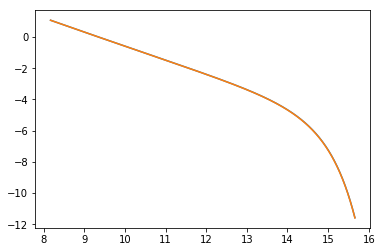

In [77]:
plt.plot(hmf[0][:,0], hmf[0][:,1])
plt.plot(hmft[0][:,0], hmft[0][:,1])

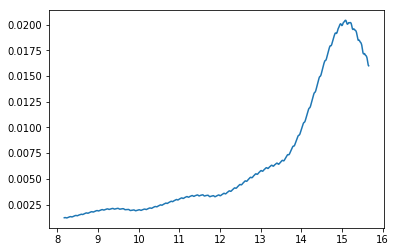

In [79]:
plt.plot(hmf[0][:,0], hmf[0][:,1] - hmft[0][:,1])

In [75]:
hmf[0][:,0].shape

(750,)